# 在多分类任务中使用至少三种不同的激活函数
使用不同的激活函数，进行对比实验并分析实验结果

为了在多分类任务中使用不同的激活函数进行对比实验，我们可以在网络定义中调整激活函数。常用的激活函数包括 ReLU、Sigmoid 和 Tanh 等。以下代码将在多分类任务中测试三种不同的激活函数。
在以下代码中，定义一个参数`activation_fn`来选择激活函数，并将其应用到 `SimpleNN `网络结构中。然后我们分别用` ReLU`、`Sigmoid `和 `Tanh` 三种激活函数来训练和测试多分类任务。

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from torchvision import datasets, transforms

In [3]:
# 多分类任务数据路径
mnist_data_path = r'C:\Users\37623\jupyter_test\Lab2_Nerual_Network\dataset\MNIST_data'

# 1. 定义前馈神经网络模型，支持不同的激活函数

In [4]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, output_dim, activation_fn=nn.ReLU):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.activation = activation_fn()  # 使用参数化激活函数
    
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# 2. 训练和测试函数

In [5]:
def train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    train_loss_list, test_loss_list = [], []
    train_acc_list, test_acc_list = [], []
    start_time = time.time()
    
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct = 0, 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
            
            # 计算训练准确度
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
        
        train_loss = total_loss / len(train_loader.dataset)
        train_loss_list.append(train_loss)
        train_acc = correct / len(train_loader.dataset)
        train_acc_list.append(train_acc)
        
        # 测试模式
        model.eval()
        total_loss, correct = 0, 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                total_loss += loss.item() * inputs.size(0)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == targets).sum().item()
        
        test_loss = total_loss / len(test_loader.dataset)
        test_loss_list.append(test_loss)
        test_acc = correct / len(test_loader.dataset)
        test_acc_list.append(test_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    total_time = time.time() - start_time
    return train_loss_list, test_loss_list, train_acc_list, test_acc_list, total_time

# 3. 加载 MNIST 数据集

In [6]:
def load_mnist_data(path):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
    train_data = datasets.MNIST(root=path, train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root=path, train=False, download=True, transform=transform)
    return train_data, test_data

# 4. 训练和可视化

Epoch 1/10 - Train Loss: 0.2900, Test Loss: 0.1417
Epoch 2/10 - Train Loss: 0.1167, Test Loss: 0.0978
Epoch 3/10 - Train Loss: 0.0800, Test Loss: 0.0868
Epoch 4/10 - Train Loss: 0.0596, Test Loss: 0.0786
Epoch 5/10 - Train Loss: 0.0483, Test Loss: 0.0842
Epoch 6/10 - Train Loss: 0.0376, Test Loss: 0.0782
Epoch 7/10 - Train Loss: 0.0305, Test Loss: 0.0846
Epoch 8/10 - Train Loss: 0.0279, Test Loss: 0.0791
Epoch 9/10 - Train Loss: 0.0226, Test Loss: 0.0962
Epoch 10/10 - Train Loss: 0.0179, Test Loss: 0.0834


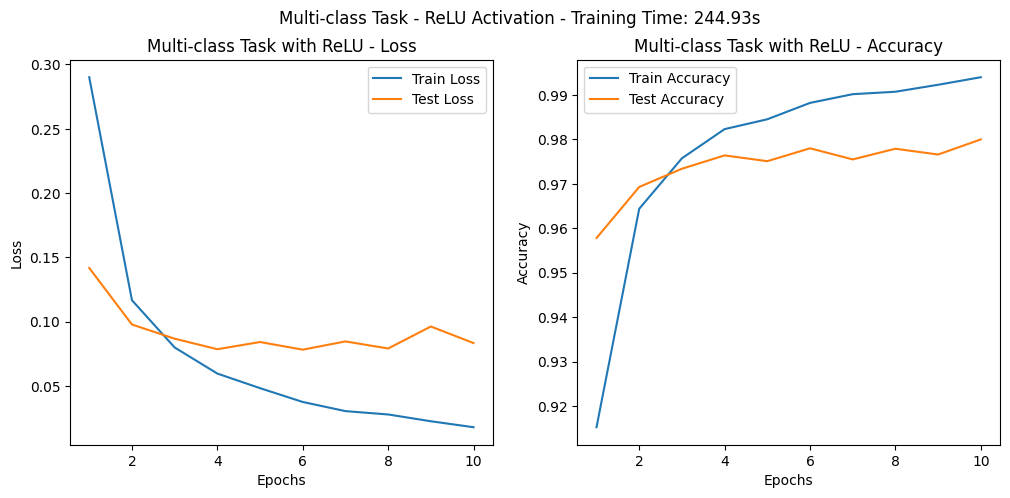

Epoch 1/10 - Train Loss: 0.5259, Test Loss: 0.2137
Epoch 2/10 - Train Loss: 0.1757, Test Loss: 0.1453
Epoch 3/10 - Train Loss: 0.1208, Test Loss: 0.1151
Epoch 4/10 - Train Loss: 0.0898, Test Loss: 0.1016
Epoch 5/10 - Train Loss: 0.0697, Test Loss: 0.0903
Epoch 6/10 - Train Loss: 0.0552, Test Loss: 0.0811
Epoch 7/10 - Train Loss: 0.0444, Test Loss: 0.0791
Epoch 8/10 - Train Loss: 0.0356, Test Loss: 0.0772
Epoch 9/10 - Train Loss: 0.0285, Test Loss: 0.0737
Epoch 10/10 - Train Loss: 0.0228, Test Loss: 0.0847


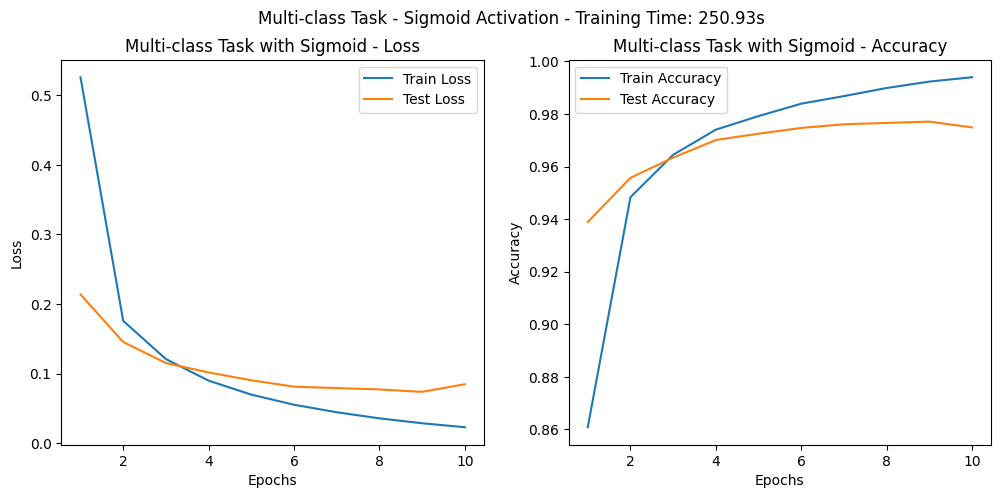

Epoch 1/10 - Train Loss: 0.2851, Test Loss: 0.1433
Epoch 2/10 - Train Loss: 0.1204, Test Loss: 0.1037
Epoch 3/10 - Train Loss: 0.0796, Test Loss: 0.0893
Epoch 4/10 - Train Loss: 0.0599, Test Loss: 0.0852
Epoch 5/10 - Train Loss: 0.0461, Test Loss: 0.0757
Epoch 6/10 - Train Loss: 0.0361, Test Loss: 0.0967
Epoch 7/10 - Train Loss: 0.0287, Test Loss: 0.1053
Epoch 8/10 - Train Loss: 0.0230, Test Loss: 0.0748
Epoch 9/10 - Train Loss: 0.0198, Test Loss: 0.0782
Epoch 10/10 - Train Loss: 0.0189, Test Loss: 0.0804


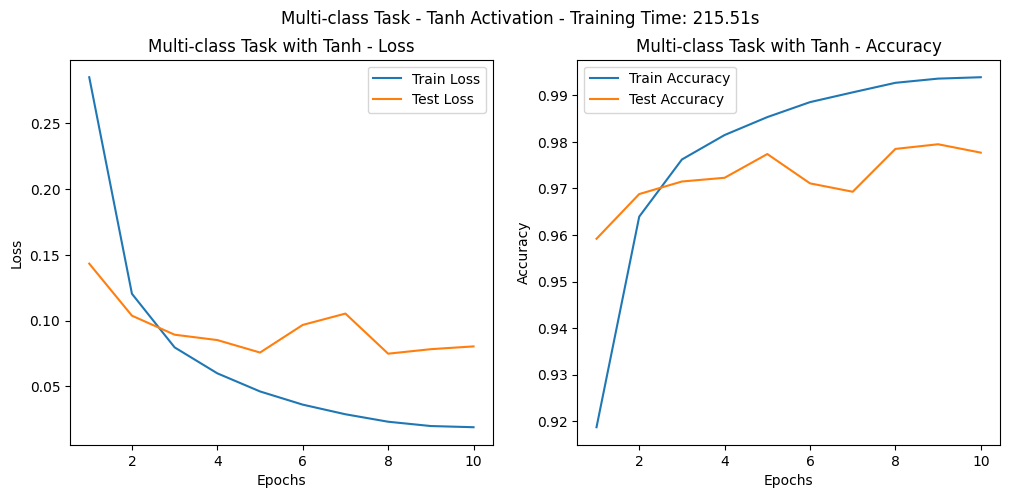

In [8]:
def run_experiment(activation_fn, num_epochs=10):
    train_dataset, test_dataset = load_mnist_data(mnist_data_path)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    model = SimpleNN(input_dim=784, output_dim=10, activation_fn=activation_fn)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loss, test_loss, train_acc, test_acc, total_time = train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, num_epochs)
    
    # 可视化训练过程
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, test_loss, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Multi-class Task with {activation_fn.__name__} - Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, test_acc, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Multi-class Task with {activation_fn.__name__} - Accuracy')
    plt.legend()
    
    plt.suptitle(f'Multi-class Task - {activation_fn.__name__} Activation - Training Time: {total_time:.2f}s')
    plt.show()

# 执行多分类任务的实验，分别使用 ReLU、Sigmoid 和 Tanh 激活函数
run_experiment(nn.ReLU, num_epochs=10)
run_experiment(nn.Sigmoid, num_epochs=10)
run_experiment(nn.Tanh, num_epochs=10)